In [1]:
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

from bioinfokit.visuz import cluster
from scipy.stats import entropy

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [2]:
vehicle = pd.read_excel("C:\\Users\\josea\\OneDrive\\Desktop\\Feynn ML Internship\\Project 2\\Segmentation Analysis\\EV_Data.xlsx")
vehicle.head()

,Category,Brand,Model,ChargingTime(hrs),Mileage(km),Cost(Rs.),TopSpeed(km/h),Sales
0,2-Wheeler,Hero Electric,Optima HX,4.00,82,61000,42,95000
1,2-Wheeler,Hero Electric,Photon HX,5.00,108,79000,45,60000
2,2-Wheeler,Hero Electric,NYX HX,4.00,165,67000,42,45000
3,2-Wheeler,Okinawa Autotech,Praise Pro,3.00,88,79990,58,29000
4,2-Wheeler,Okinawa Autotech,iPraise+,4.00,139,112990,58,25000


In [3]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           93 non-null     object 
 1   Brand              93 non-null     object 
 2   Model              93 non-null     object 
 3   ChargingTime(hrs)  93 non-null     float64
 4   Mileage(km)        93 non-null     int64  
 5   Cost(Rs.)          93 non-null     int64  
 6   TopSpeed(km/h)     93 non-null     int64  
 7   Sales              93 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 5.9+ KB


In [4]:
vehicle = vehicle.astype({'Mileage(km)': 'float', 'Cost(Rs.)': 'float', 'TopSpeed(km/h)': 'float', 'Sales': 'float'})
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           93 non-null     object 
 1   Brand              93 non-null     object 
 2   Model              93 non-null     object 
 3   ChargingTime(hrs)  93 non-null     float64
 4   Mileage(km)        93 non-null     float64
 5   Cost(Rs.)          93 non-null     float64
 6   TopSpeed(km/h)     93 non-null     float64
 7   Sales              93 non-null     float64
dtypes: float64(5), object(3)
memory usage: 5.9+ KB


In [5]:
vehicle.isnull().sum()

Category             0
Brand                0
Model                0
ChargingTime(hrs)    0
Mileage(km)          0
Cost(Rs.)            0
TopSpeed(km/h)       0
Sales                0
dtype: int64

In [6]:
vehicle.describe()

,ChargingTime(hrs),Mileage(km),Cost(Rs.),TopSpeed(km/h),Sales
count,93.00,93.00,93.00,93.00,93.00
mean,5.74,173.13,3071707.34,64.77,17259.31
std,1.61,145.86,6684550.13,52.94,18203.83
min,2.00,60.00,42000.00,25.00,40.00
25%,5.00,90.00,140000.00,25.00,11000.00
50%,6.00,100.00,150000.00,45.00,13000.00
75%,6.00,200.00,1390000.00,78.00,20000.00
max,12.00,770.00,29000000.00,245.00,100000.00


## Exploratory Data Analysis

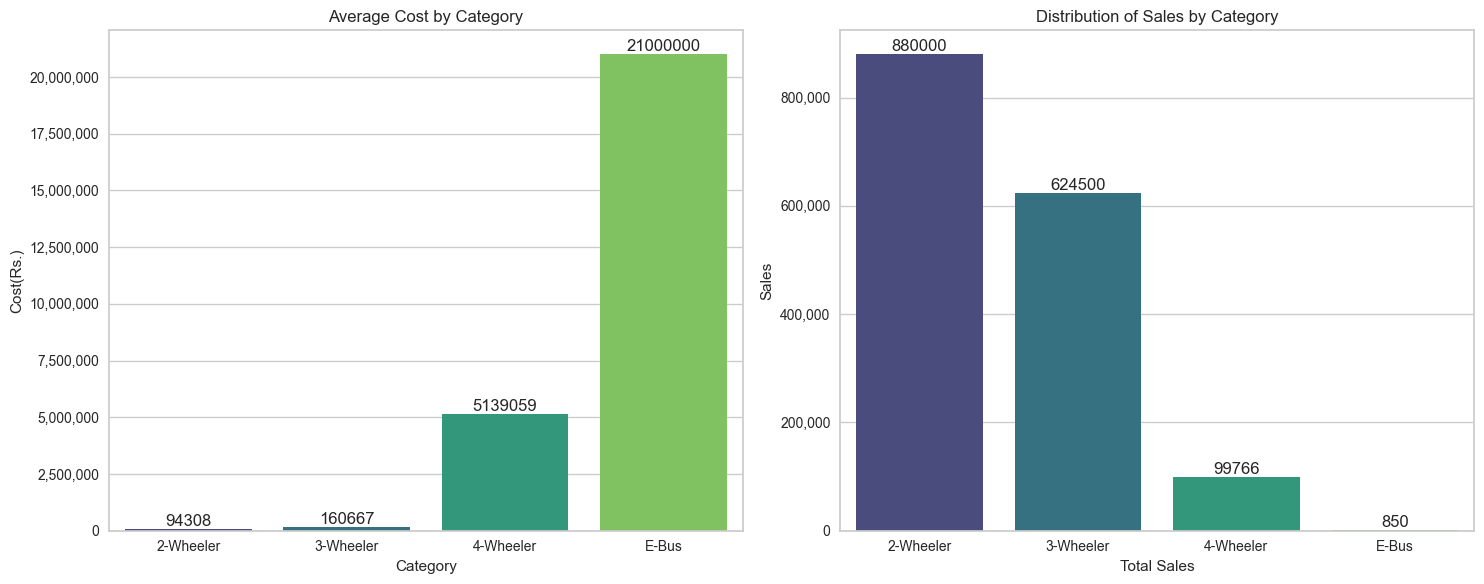

In [7]:
def custom_formatter(x, pos):
    return f'{x:,.0f}'

fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax1 = sns.barplot(ax = ax[0], data = vehicle, y = 'Cost(Rs.)', x = 'Category', hue = 'Category', palette = 'viridis', estimator = 'mean', errorbar = None)
for i in ax1.containers:
    ax1.bar_label(i, fmt = '%.0f')
    ax1.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
ax[0].set_title('Average Cost by Category')
plt.xlabel('Total Cost (Rs.)')

ax2 = sns.barplot(ax = ax[1], data = vehicle, y = 'Sales', x = 'Category', hue = 'Category', palette = 'viridis', estimator = 'sum', errorbar = None)
for i in ax2.containers:
    ax2.bar_label(i, fmt = '%.0f')
    ax2.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
ax[1].set_title('Distribution of Sales by Category')
plt.xlabel('Total Sales')

plt.tight_layout()
plt.show()

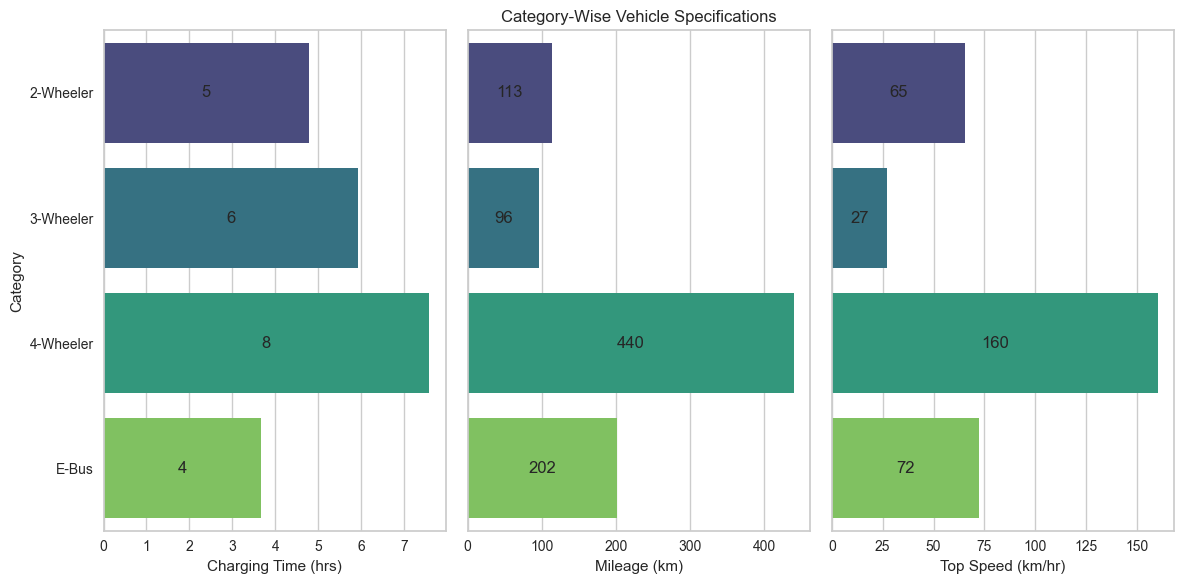

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (12, 6), sharey = True)
ax1 = sns.barplot(ax = ax[0], data = vehicle, x = 'ChargingTime(hrs)', y = 'Category', hue = 'Category', estimator = 'mean', palette = 'viridis', errorbar = None)
for i in ax1.containers:
    ax1.bar_label(i, label_type = 'center', fmt = '%.0f')
ax[0].set_xlabel('Charging Time (hrs)')

ax2 = sns.barplot(ax = ax[1], data = vehicle, x = 'Mileage(km)', y = 'Category', hue = 'Category', estimator = 'mean', palette = 'viridis', errorbar = None)
for i in ax2.containers:
    ax2.bar_label(i, label_type = 'center', fmt = '%.0f')
ax[1].set_xlabel('Mileage (km)')
ax[1].set_title('Category-Wise Vehicle Specifications')

ax3 = sns.barplot(ax = ax[2], data = vehicle, x = 'TopSpeed(km/h)', y = 'Category', hue = 'Category', estimator = 'mean', palette = 'viridis', errorbar = None)
for i in ax3.containers:
    ax3.bar_label(i, label_type = 'center', fmt = '%.0f')
ax[2].set_xlabel('Top Speed (km/hr)')

plt.ylabel('Category')
plt.tight_layout()
plt.show()

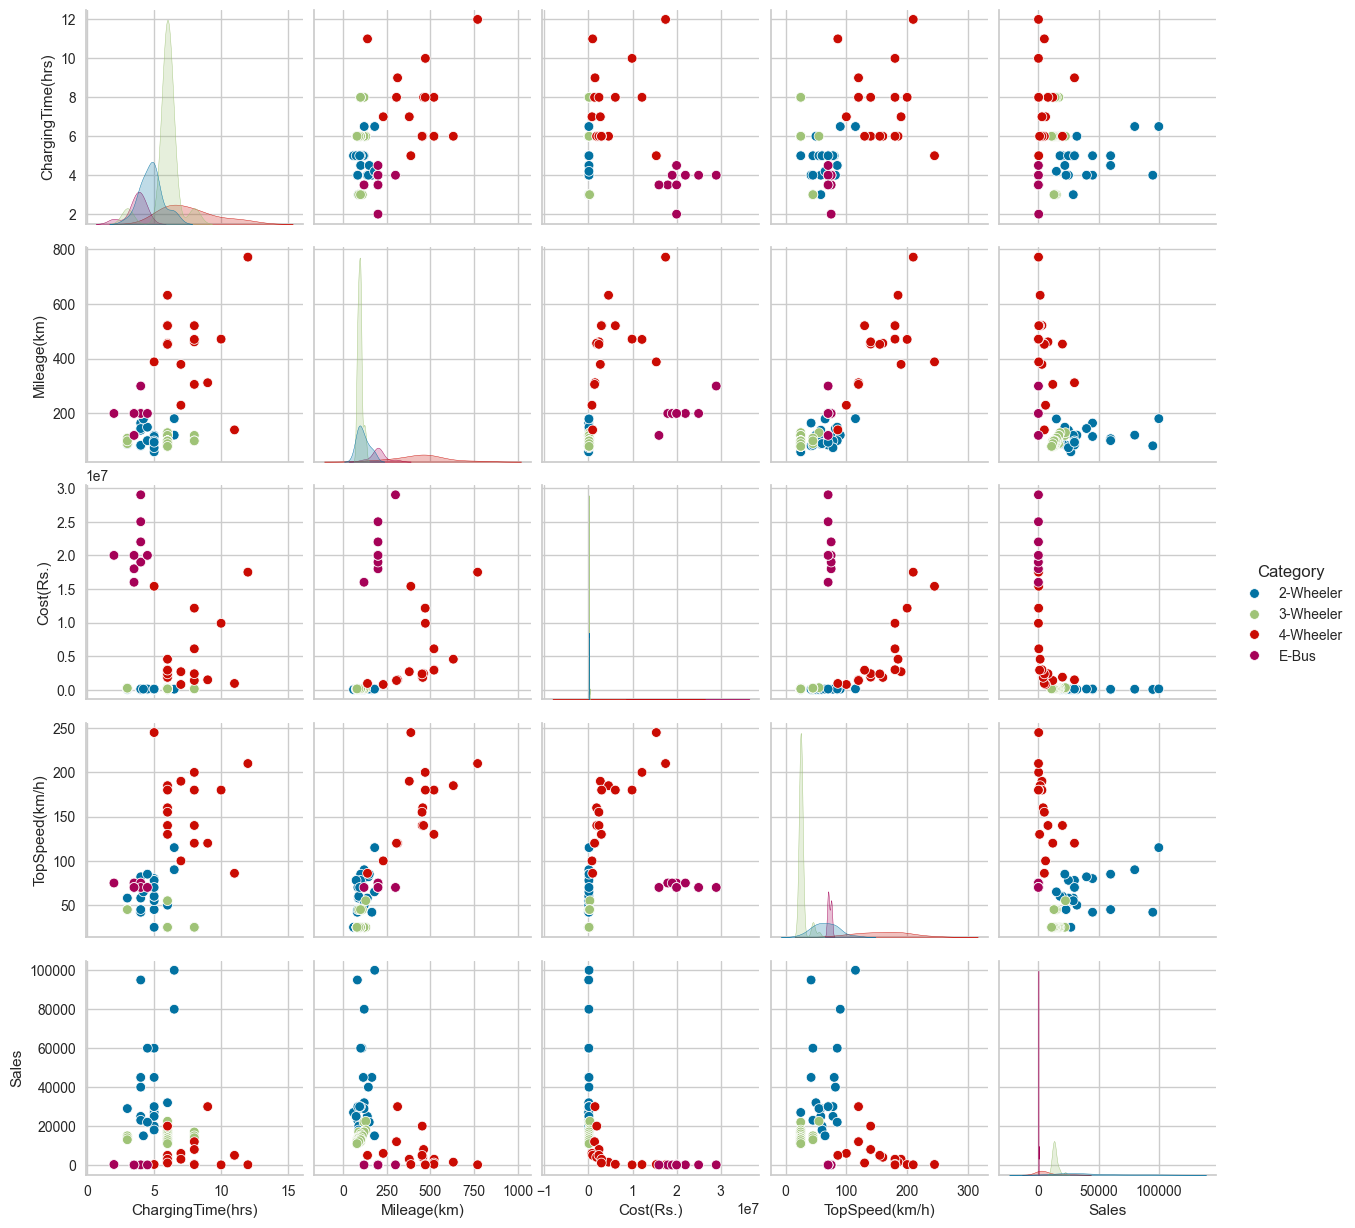

In [9]:
sns.pairplot(vehicle, hue = 'Category')

<Axes: >

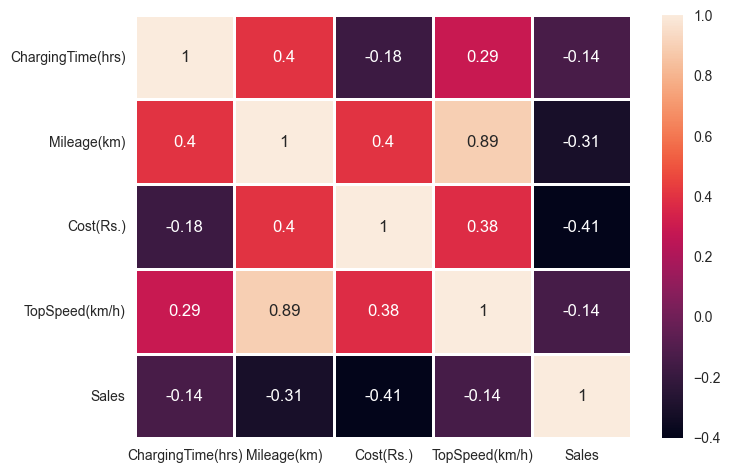

In [10]:
sns.heatmap(vehicle.iloc[:, 3:].corr(), linewidths = 1, annot = True)

## Principal Component Analysis

In [11]:
vehiclescaled = StandardScaler().fit_transform(vehicle.iloc[:, 3:7].values)
vehiclescaleddf = pd.DataFrame(vehiclescaled, columns = ['ChargingTime(hrs)', 'Mileage(km)', 'Cost(Rs.)', 'TopSpeed(km/h)'])
vehiclescaleddf = pd.concat([vehicle.iloc[:, :3], vehiclescaleddf], axis = 1)
vehiclescaleddf.head()

,Category,Brand,Model,ChargingTime(hrs),Mileage(km),Cost(Rs.),TopSpeed(km/h)
0,2-Wheeler,Hero Electric,Optima HX,-1.09,-0.63,-0.45,-0.43
1,2-Wheeler,Hero Electric,Photon HX,-0.46,-0.45,-0.45,-0.38
2,2-Wheeler,Hero Electric,NYX HX,-1.09,-0.06,-0.45,-0.43
3,2-Wheeler,Okinawa Autotech,Praise Pro,-1.71,-0.59,-0.45,-0.13
4,2-Wheeler,Okinawa Autotech,iPraise+,-1.09,-0.24,-0.45,-0.13


In [12]:
pca = PCA()
data_model = vehiclescaleddf.drop(['Category', 'Brand', 'Model'], axis = 1)
pcafit = pca.fit_transform(data_model)

pcexp = np.sqrt(pca.explained_variance_)
pcexpratio = pca.explained_variance_ratio_
pccum = pcexpratio.cumsum()
pcindex = [f"PC{i}" for i in range(1, len(pcexp) + 1)]
pcaresult = pd.DataFrame({'Standard Deviation': pcexp, 'Proportion of Variance': pcexpratio, 'Cumulative Proportion': pccum}, index = pcindex)
pcaresult

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,1.51,0.57,0.57
PC2,1.09,0.30,0.86
PC3,0.68,0.11,0.98
PC4,0.31,0.02,1.00


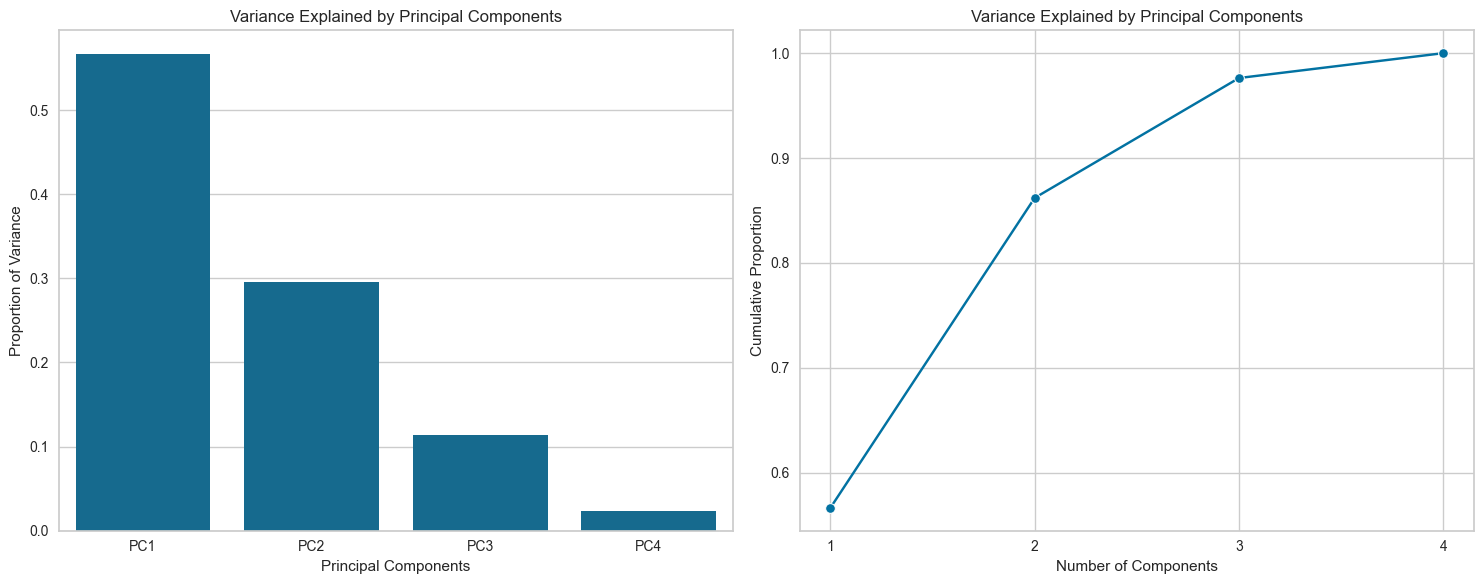

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.barplot(ax = ax[0], data = pcaresult, y = 'Proportion of Variance', x = pcaresult.index.values, errorbar = None)
ax[0].set_title('Variance Explained by Principal Components')
ax[0].set_xlabel('Principal Components')

sns.lineplot(ax = ax[1], data = pcaresult, y = 'Cumulative Proportion', x = range(1, 5), marker = 'o', errorbar = None)
ax[1].set_title('Variance Explained by Principal Components')
ax[1].set_xticks([1, 2, 3, 4])
ax[1].set_xlabel('Number of Components')

plt.tight_layout()
plt.show()

In [14]:
pcaf = pca.fit(data_model)
rotated = pcaf.components_.T

rotated_df = pd.DataFrame(rotated, index = vehiclescaleddf.iloc[:, 3:].columns.values, columns = pcindex)
rotated_df = round(-rotated_df, 3)
rotated_df

,PC1,PC2,PC3,PC4
ChargingTime(hrs),-0.29,0.74,-0.59,-0.13
Mileage(km),-0.64,0.04,0.20,0.74
Cost(Rs.),-0.35,-0.67,-0.65,-0.08
TopSpeed(km/h),-0.62,-0.02,0.43,-0.65


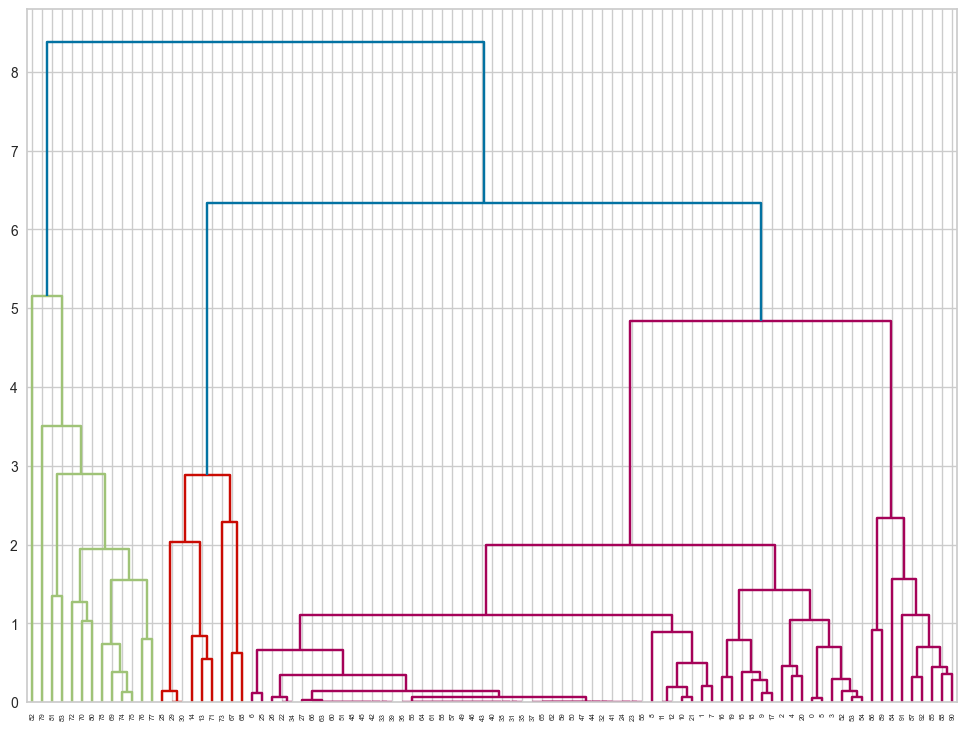

In [15]:
pcafit2 = pd.DataFrame(pcafit, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

linked = linkage(pcafit2, 'complete')
plt.figure(figsize = (12, 9))
dendrogram(linked, orientation='top')
plt.show()

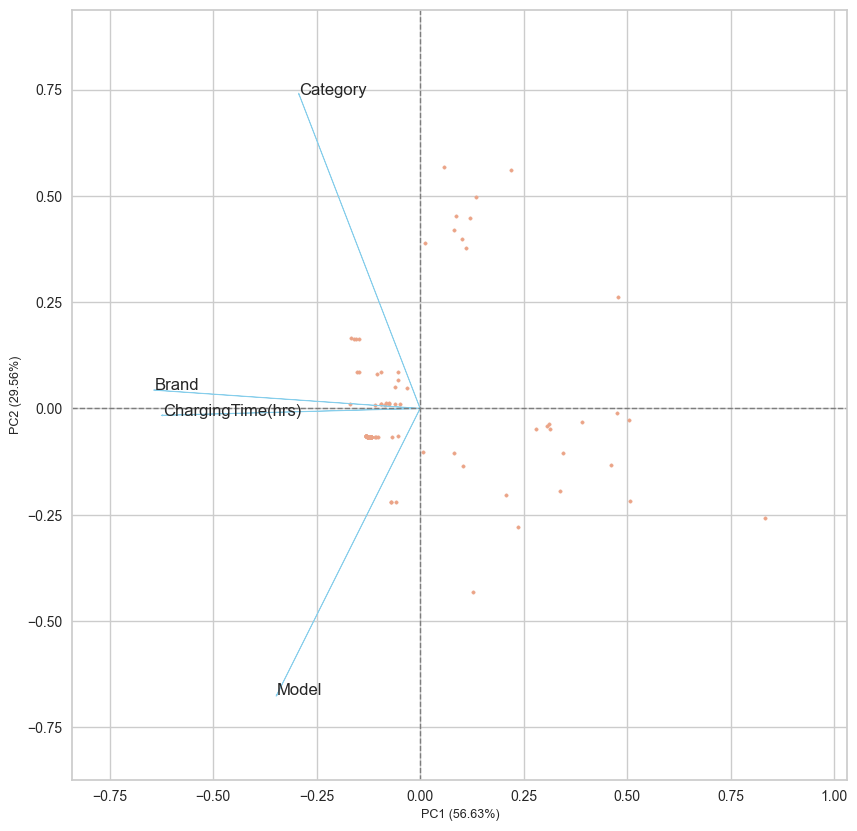

In [16]:
loadings = (pca.components_)
cluster.biplot(cscore = pcafit, loadings = -loadings, labels = vehiclescaleddf.columns.values, 
               var1 = round(pcexpratio[0]*100, 2),
               var2 = round(pcexpratio[1]*100, 2),
               show = True, dim = (10, 10))

## K-Means Clustering

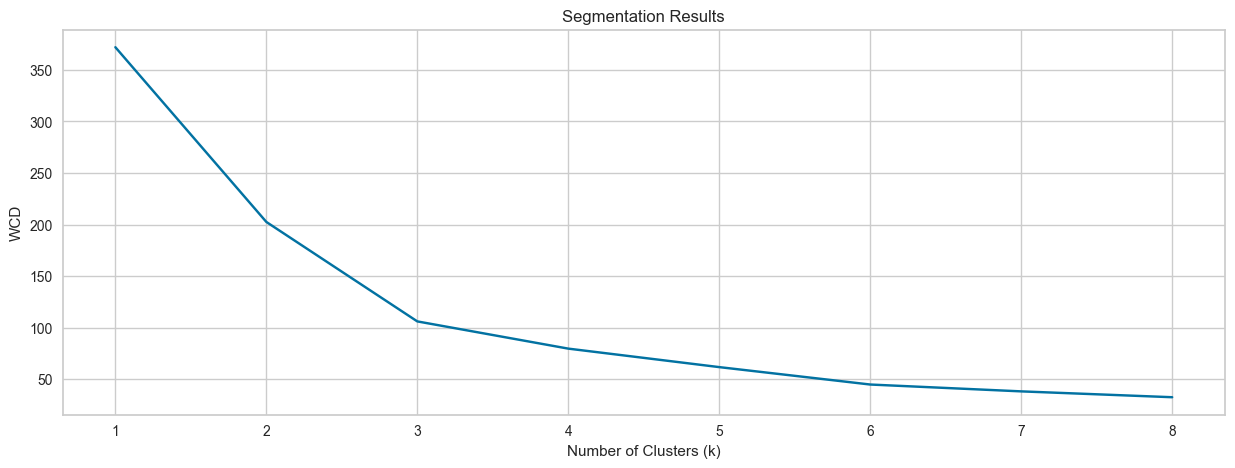

In [17]:
# Within Cluster Dsitances
WCD = []
for k in range(1,9):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 1234)
    kmeans.fit(data_model)
    WCD.append(kmeans.inertia_)

plt.figure(figsize = (15, 5))
plt.plot(range(1, 9), WCD)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCD")
plt.title("Segmentation Results")
plt.show()

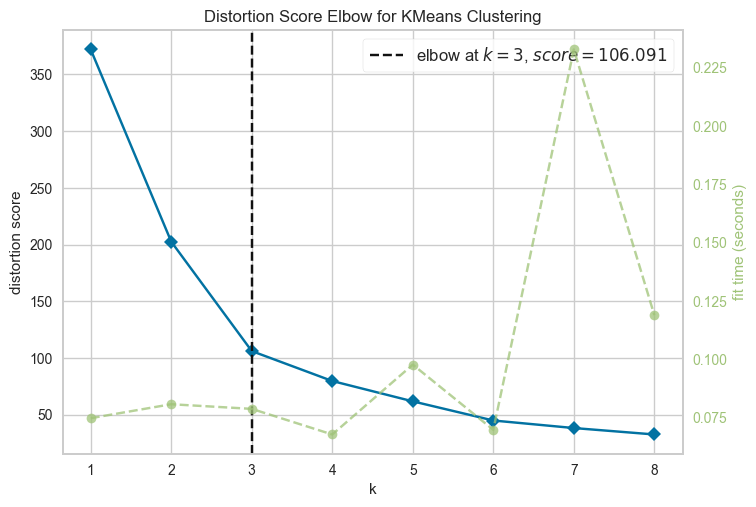

In [18]:
model = KMeans(n_init = 10, random_state = 1234)
visualizer = KElbowVisualizer(model, k = (1,9), metric = 'distortion', timings = True)
visualizer.fit(pcafit)
visualizer.show()
plt.show()

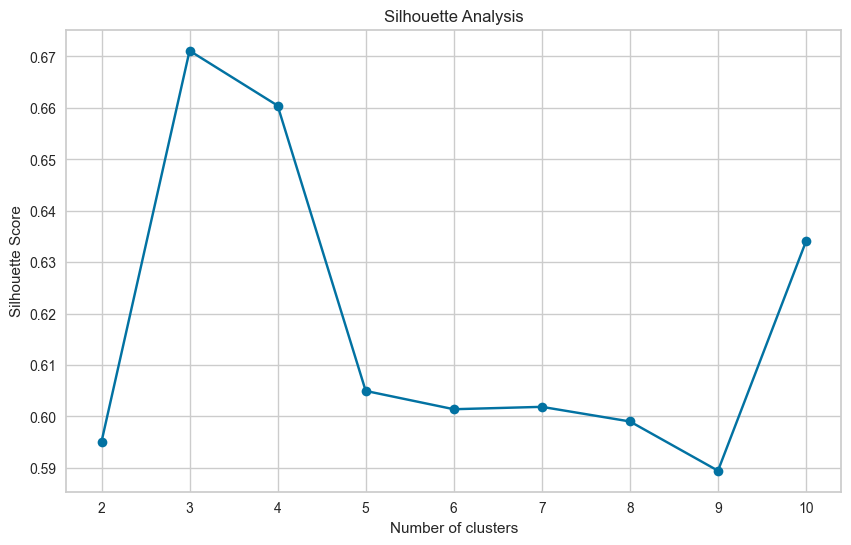

In [19]:
numeric_features = ['ChargingTime(hrs)', 'Mileage(km)', 'Cost(Rs.)', 'TopSpeed(km/h)']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(vehicle[numeric_features])

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [20]:
numeric_features = ['ChargingTime(hrs)', 'Mileage(km)', 'Cost(Rs.)', 'TopSpeed(km/h)']
scaled_features = scaler.fit_transform(vehicle[numeric_features])

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
vehicle['Cluster'] = kmeans.fit_predict(scaled_features)

cluster_profiles = vehicle.groupby('Cluster')[numeric_features + ['Sales']].mean()
cluster_profiles

,ChargingTime(hrs),Mileage(km),Cost(Rs.),TopSpeed(km/h),Sales
Cluster,,,,,
0,5.58,103.40,148585.04,40.49,22213.24
1,3.67,202.22,21000000.00,72.22,94.44
2,7.62,453.12,5410312.50,163.81,5860.38


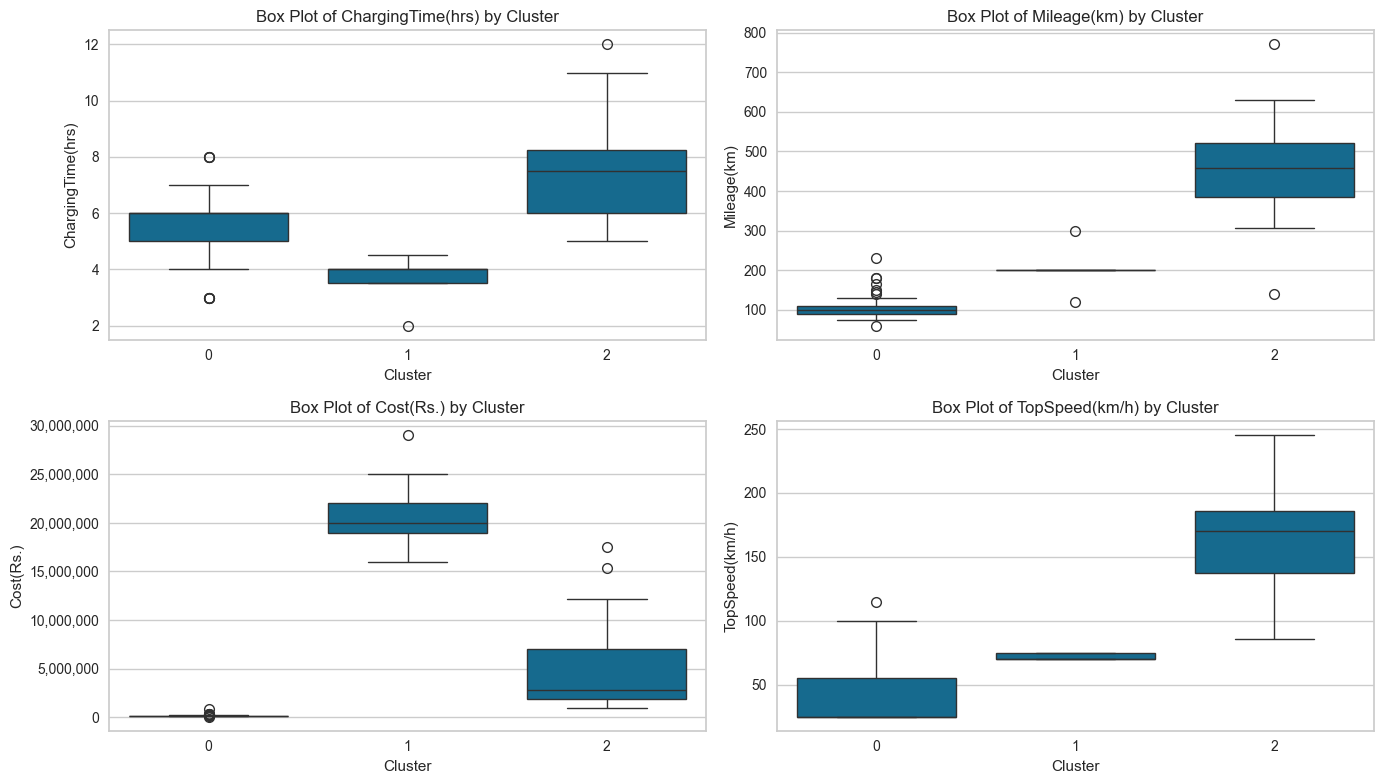

In [21]:
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=vehicle)
    plt.title(f'Box Plot of {feature} by Cluster')
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

plt.tight_layout()
plt.show()

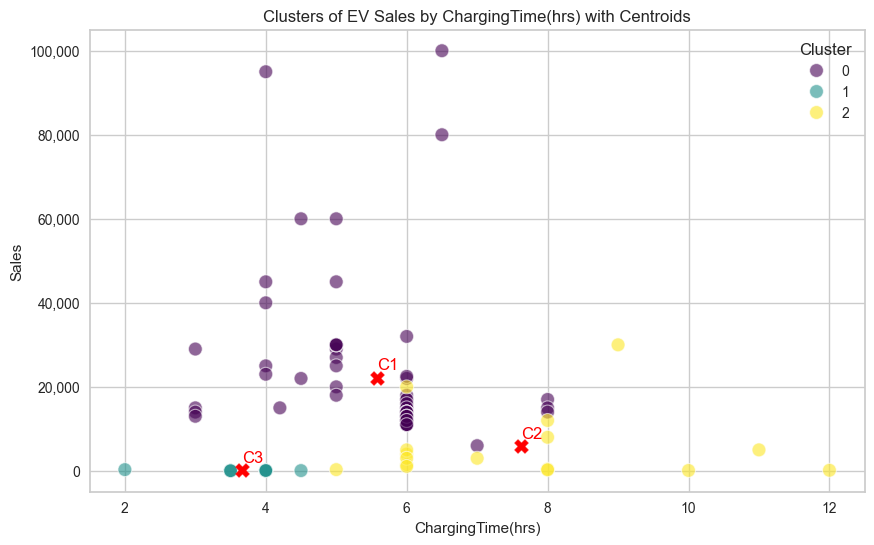

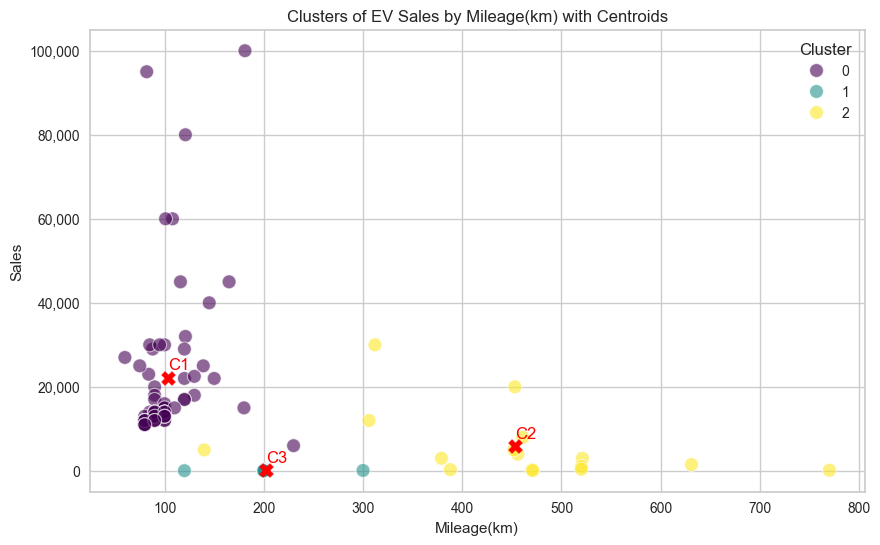

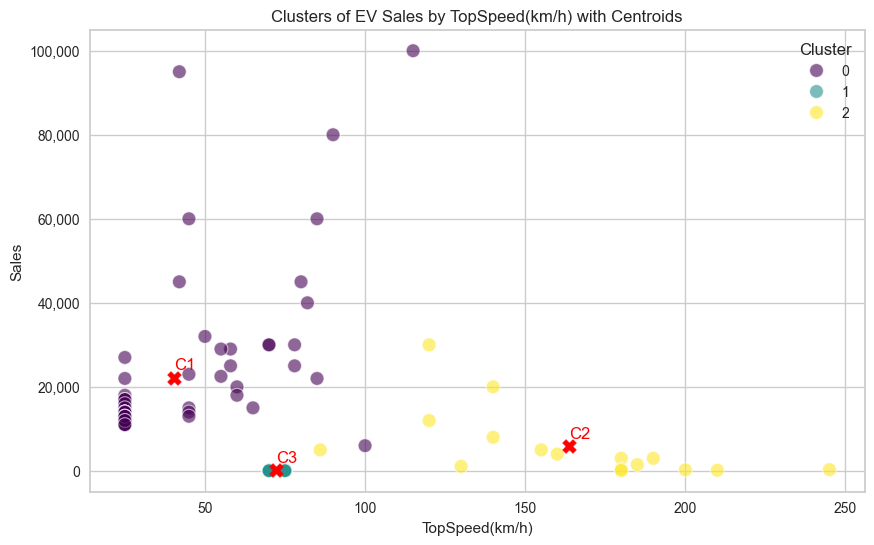

In [22]:
scaler = StandardScaler()
scaleddata = scaler.fit_transform(vehicle.iloc[:, 3:8].values)
kmeans = KMeans(n_clusters = 3, random_state = 1234)
kmeans.fit_transform(scaleddata)

# Visualizing clusters with centroids
visualcols = ['ChargingTime(hrs)', 'Mileage(km)', 'TopSpeed(km/h)']
for i in range(len(visualcols)):
    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(x=visualcols[i], y='Sales', hue='Cluster', palette='viridis', data=vehicle, s=100, alpha=0.6, edgecolor='w')
    ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
    ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids[:, [2, 3]] = centroids[:, [3, 2]]
    plt.scatter(centroids[:, i], centroids[:, 4], s=100, c='red', marker='X')
    for k, c in enumerate(centroids):
        plt.text(c[i], c[4] + 2000, f'C{k+1}', fontsize=12, color='red')
    plt.title(f'Clusters of EV Sales by {visualcols[i]} with Centroids')
    plt.xlabel(f'{visualcols[i]}')
    plt.ylabel('Sales')
    plt.legend(title='Cluster')
    plt.show()

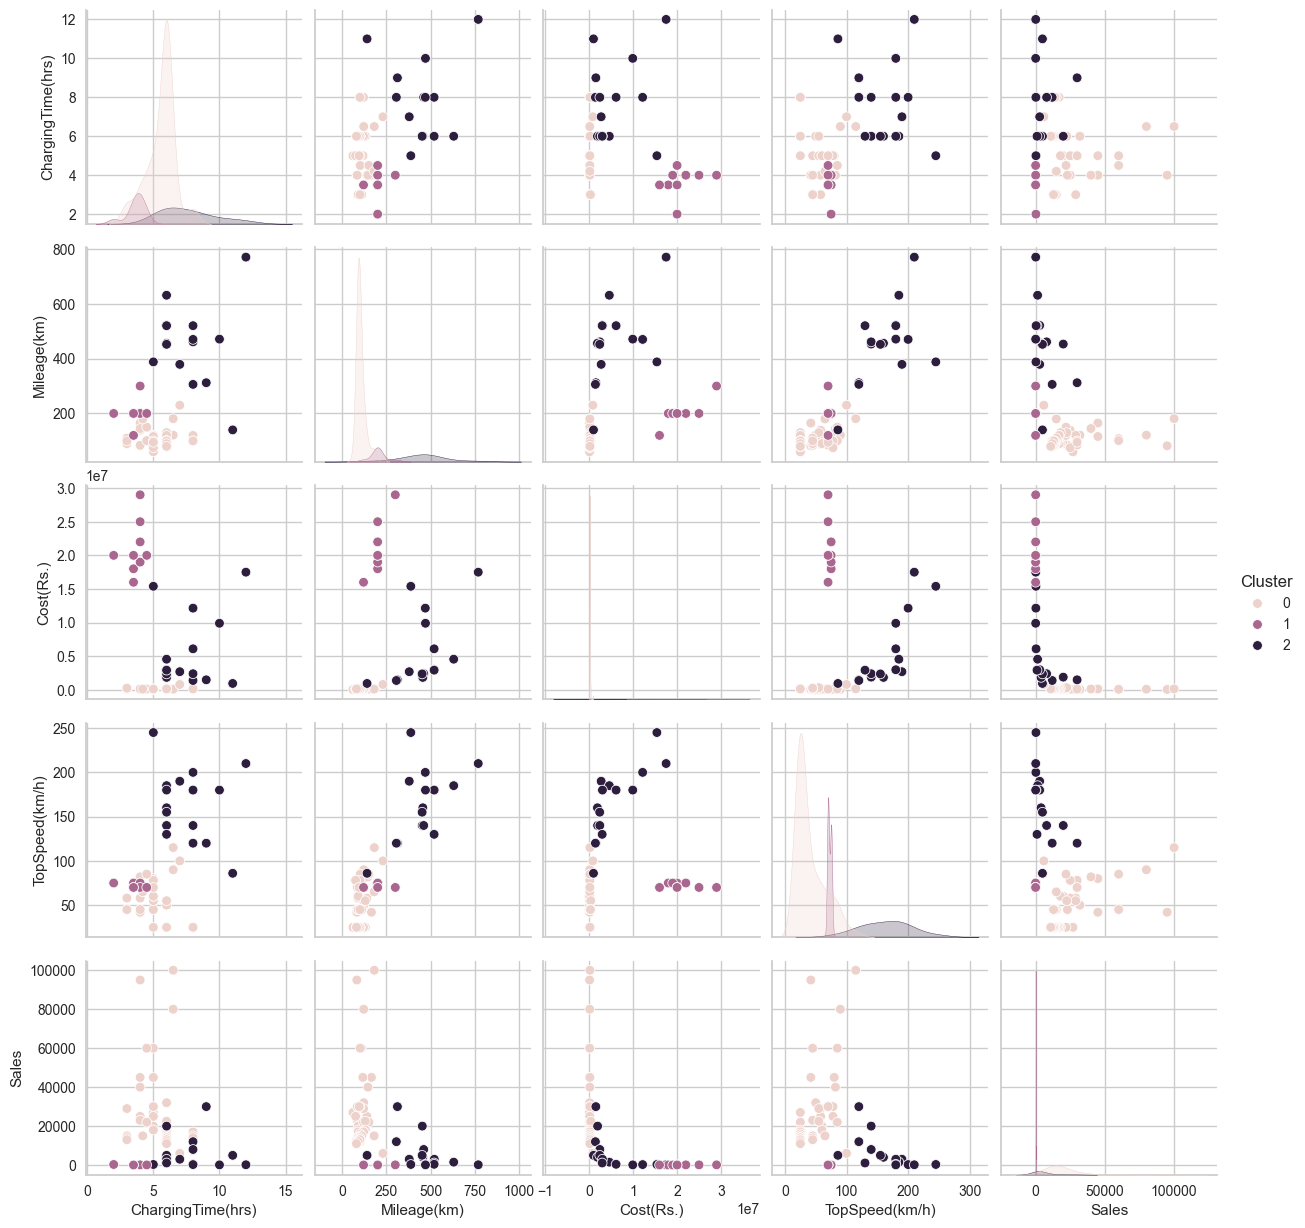

In [23]:
sns.pairplot(vehicle, hue = 'Cluster')

## Target Customer Analysis

In [24]:
customer = pd.read_csv("C:\\Users\\josea\\OneDrive\\Desktop\\Feynn ML Internship\\Project 2\\Segmentation Analysis\\Car Purchase Behaviour.csv")
customer.head()

,Age,Profession,Marital Status,Education,No of Dependents,Personal Loan,House Loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,2600000,1600000


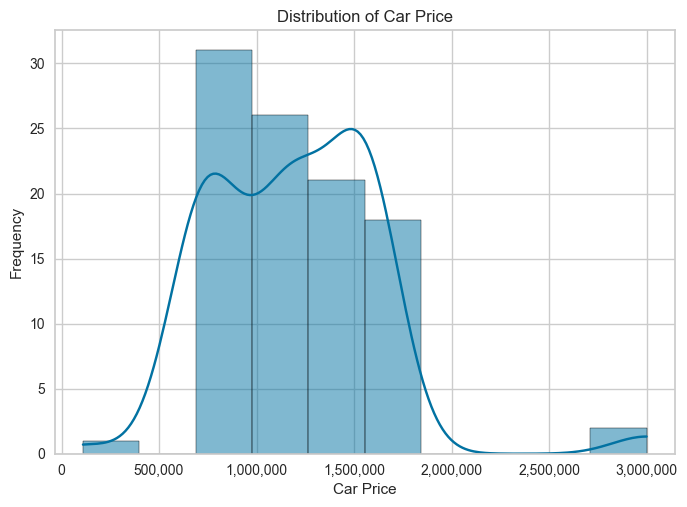

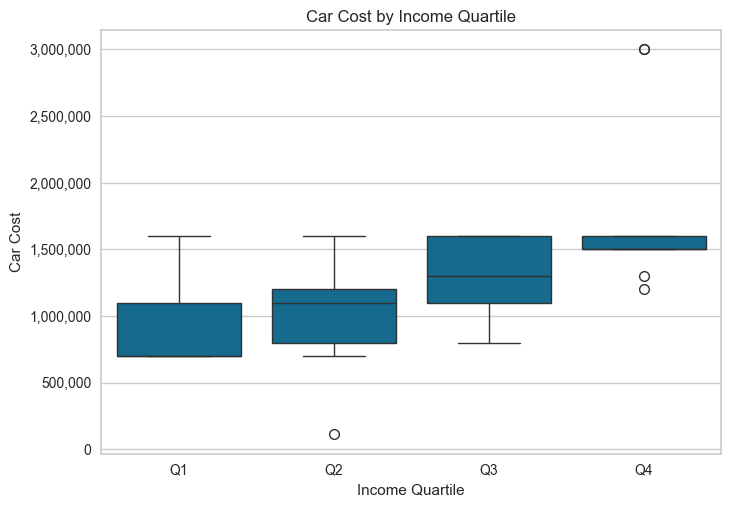

In [25]:
ax = sns.histplot(customer['Price'], kde=True)
ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
plt.title('Distribution of Car Price')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

customer['Income Quartile'] = pd.qcut(customer['Total Salary'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
ax = sns.boxplot(x='Income Quartile', y='Price', data=customer)
ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
plt.title('Car Cost by Income Quartile')
plt.xlabel('Income Quartile')
plt.ylabel('Car Cost')
plt.show()

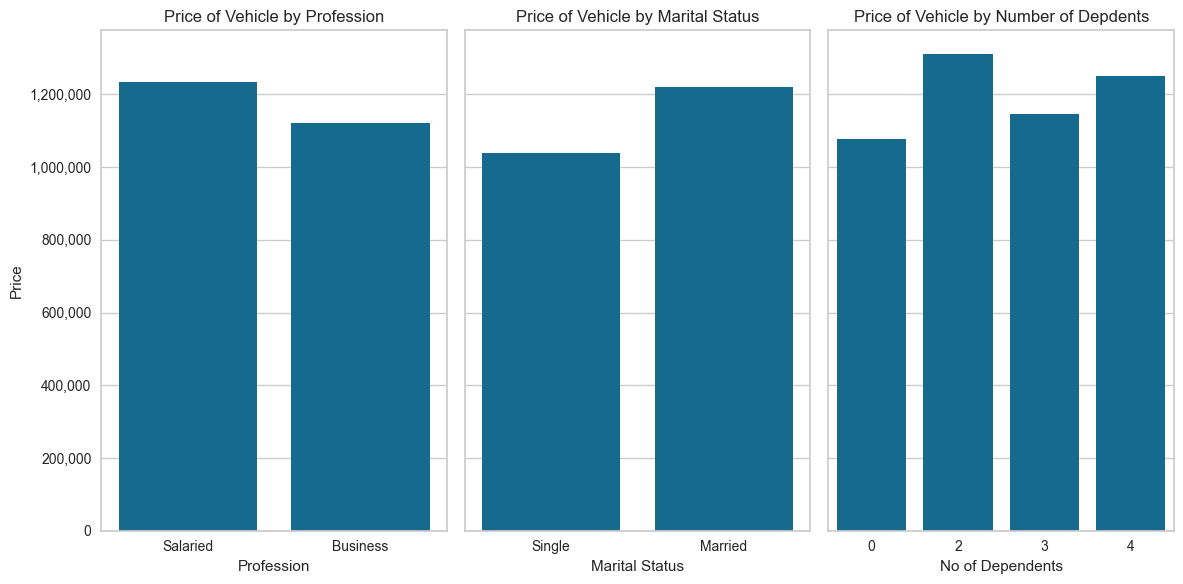

In [26]:
fig, ax = plt.subplots(1, 3, figsize = (12, 6), sharey = True)

ax1 = sns.barplot(ax = ax[0], data = customer, x = 'Profession', y = 'Price', errorbar = None)
ax[0].set_xlabel('Profession')
ax[0].set_title('Price of Vehicle by Profession')
ax1.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

ax2 = sns.barplot(ax = ax[1], data = customer, x = 'Marital Status', y = 'Price', errorbar = None)
ax[1].set_xlabel('Marital Status')
ax[1].set_title('Price of Vehicle by Marital Status')
ax2.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

ax3 = sns.barplot(ax = ax[2], data = customer, x = 'No of Dependents', y = 'Price', errorbar = None)
ax[2].set_xlabel('No of Dependents')
ax[2].set_title('Price of Vehicle by Number of Depdents')
ax3.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

plt.tight_layout()
plt.show()

In [27]:
customer.replace({'Yes': 1, 'No': 0}, inplace = True)
customer.replace({'Salaried': 1, 'Business': 0}, inplace = True)
customer.replace({'Single': 1, 'Married': 0}, inplace = True)
customer.replace({'Post Graduate': 1, 'Graduate': 0}, inplace = True)
customer.drop('Income Quartile', axis = 1, inplace = True)
customer = customer.astype({'Profession': 'float', 'Marital Status': 'float', 'Education': 'float', 'Personal Loan': 'float', 'House Loan': 'float'})
customer.head()

,Age,Profession,Marital Status,Education,No of Dependents,Personal Loan,House Loan,Total Salary,Price
0,27,1.00,1.00,1.00,0,1.00,0.00,800000,800000
1,35,1.00,0.00,1.00,2,1.00,1.00,2000000,1000000
2,45,0.00,0.00,0.00,4,1.00,1.00,1800000,1200000
3,41,0.00,0.00,1.00,3,0.00,0.00,2200000,1200000
4,31,1.00,0.00,1.00,2,1.00,0.00,2600000,1600000


In [28]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               99 non-null     int64  
 1   Profession        99 non-null     float64
 2   Marital Status    99 non-null     float64
 3   Education         99 non-null     float64
 4   No of Dependents  99 non-null     int64  
 5   Personal Loan     99 non-null     float64
 6   House Loan        99 non-null     float64
 7   Total Salary      99 non-null     int64  
 8   Price             99 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 7.1 KB


In [29]:
customer.isnull().sum()

Age                 0
Profession          0
Marital Status      0
Education           0
No of Dependents    0
Personal Loan       0
House Loan          0
Total Salary        0
Price               0
dtype: int64

In [30]:
customer.describe()

,Age,Profession,Marital Status,Education,No of Dependents,Personal Loan,House Loan,Total Salary,Price
count,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
mean,36.31,0.65,0.15,0.57,2.18,0.32,0.37,2270707.07,1194040.40
std,6.25,0.48,0.36,0.50,1.34,0.47,0.49,1050777.41,437695.54
min,26.00,0.00,0.00,0.00,0.00,0.00,0.00,200000.00,110000.00
25%,31.00,0.00,0.00,0.00,2.00,0.00,0.00,1550000.00,800000.00
50%,36.00,1.00,0.00,1.00,2.00,0.00,0.00,2100000.00,1200000.00
75%,41.00,1.00,0.00,1.00,3.00,1.00,1.00,2700000.00,1500000.00
max,51.00,1.00,1.00,1.00,4.00,1.00,1.00,5200000.00,3000000.00


In [31]:
customerscaled = pd.DataFrame(StandardScaler().fit_transform(customer.values),
columns = customer.columns.values)

pca = PCA()
pcafit = pca.fit_transform(customerscaled)

pcexp = np.sqrt(pca.explained_variance_)
pcexpratio = pca.explained_variance_ratio_
pccum = pcexpratio.cumsum()
pcindex = [f"PC{i}" for i in range(1, len(pcexp) + 1)]
pcaresult = pd.DataFrame({'Standard Deviation': pcexp, 'Proportion of Variance': pcexpratio, 'Cumulative Proportion': pccum}, index = pcindex)
pcaresult

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,1.69,0.32,0.32
PC2,1.39,0.21,0.53
PC3,1.11,0.14,0.67
PC4,0.97,0.10,0.77
PC5,0.86,0.08,0.85
PC6,0.70,0.05,0.90
PC7,0.62,0.04,0.95
PC8,0.56,0.03,0.98
PC9,0.42,0.02,1.00


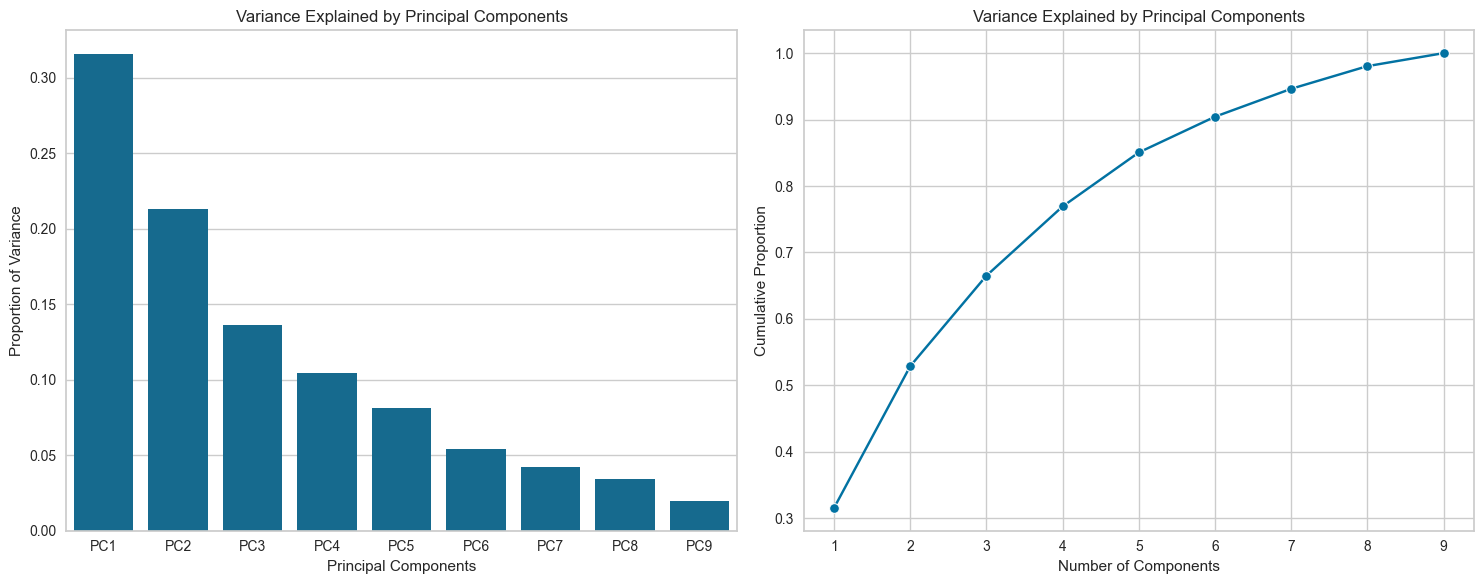

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.barplot(ax = ax[0], data = pcaresult, y = 'Proportion of Variance', x = pcaresult.index.values, errorbar = None)
ax[0].set_title('Variance Explained by Principal Components')
ax[0].set_xlabel('Principal Components')

sns.lineplot(ax = ax[1], data = pcaresult, y = 'Cumulative Proportion', x = range(1, 10), marker = 'o', errorbar = None)
ax[1].set_title('Variance Explained by Principal Components')
ax[1].set_xticks(range(1, 10))
ax[1].set_xlabel('Number of Components')

plt.tight_layout()
plt.show()

In [33]:
pcaf = pca.fit(customerscaled)
rotated = pcaf.components_.T

rotated_df = pd.DataFrame(rotated, index = customerscaled.columns.values, columns = pcindex)
rotated_df = round(-rotated_df, 3)
rotated_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Age,-0.50,-0.01,-0.12,0.11,-0.12,0.34,-0.65,0.36,0.23
Profession,-0.09,-0.06,0.72,-0.22,0.61,0.20,-0.03,0.11,0.04
Marital Status,0.45,-0.17,0.18,-0.11,-0.41,0.37,0.12,0.59,-0.23
Education,-0.05,-0.12,0.48,0.82,-0.24,-0.12,0.04,-0.07,0.04
No of Dependents,-0.41,0.27,-0.23,0.27,0.22,0.39,0.58,0.20,-0.24
Personal Loan,0.01,0.56,0.27,-0.17,-0.39,0.44,-0.03,-0.48,0.05
House Loan,-0.21,0.53,0.22,-0.18,-0.20,-0.56,0.13,0.45,0.15
Total Salary,-0.47,-0.26,0.16,-0.24,-0.26,-0.16,-0.08,-0.14,-0.72
Price,-0.33,-0.47,0.07,-0.27,-0.29,0.08,0.45,-0.08,0.55


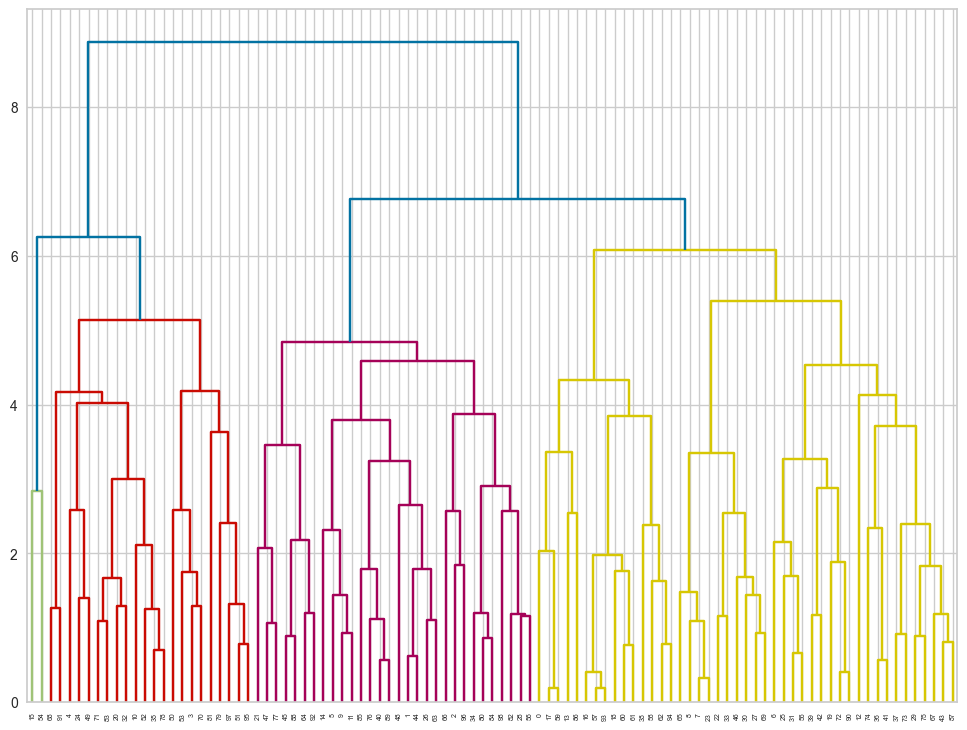

In [34]:
pcafit2 = pd.DataFrame(pcafit, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

linked = linkage(pcafit2, 'complete')
plt.figure(figsize = (12, 9))
dendrogram(linked, orientation='top')
plt.show()

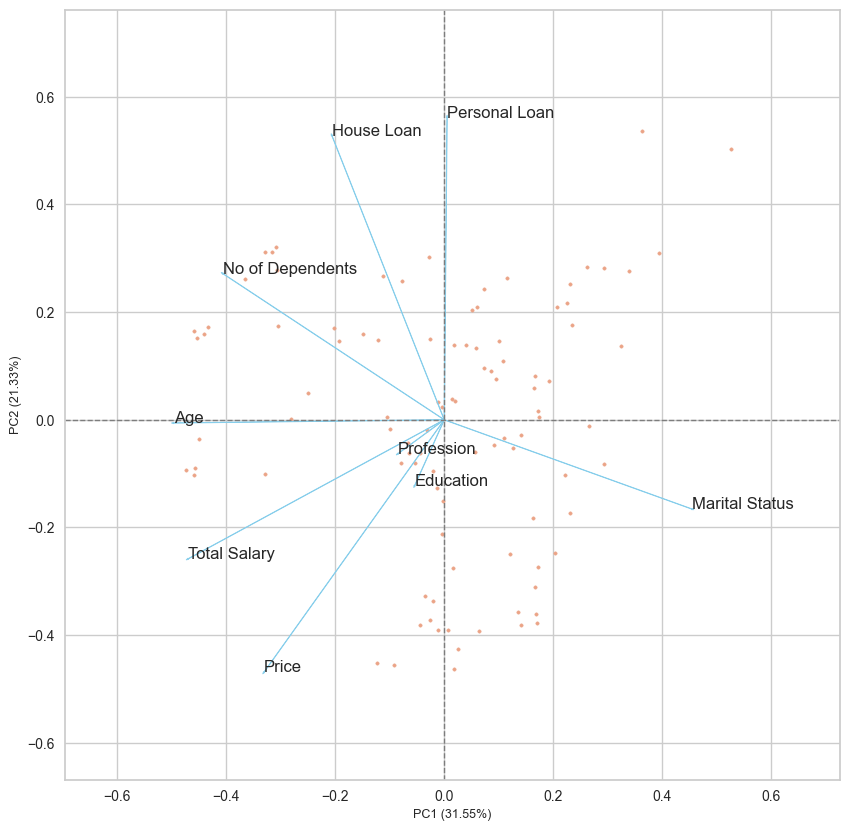

In [35]:
loadings = (pca.components_)
cluster.biplot(cscore = pcafit, loadings = -loadings, labels = customerscaled.columns.values, 
               var1 = round(pcexpratio[0]*100, 2),
               var2 = round(pcexpratio[1]*100, 2),
               show = True, dim = (10, 10))


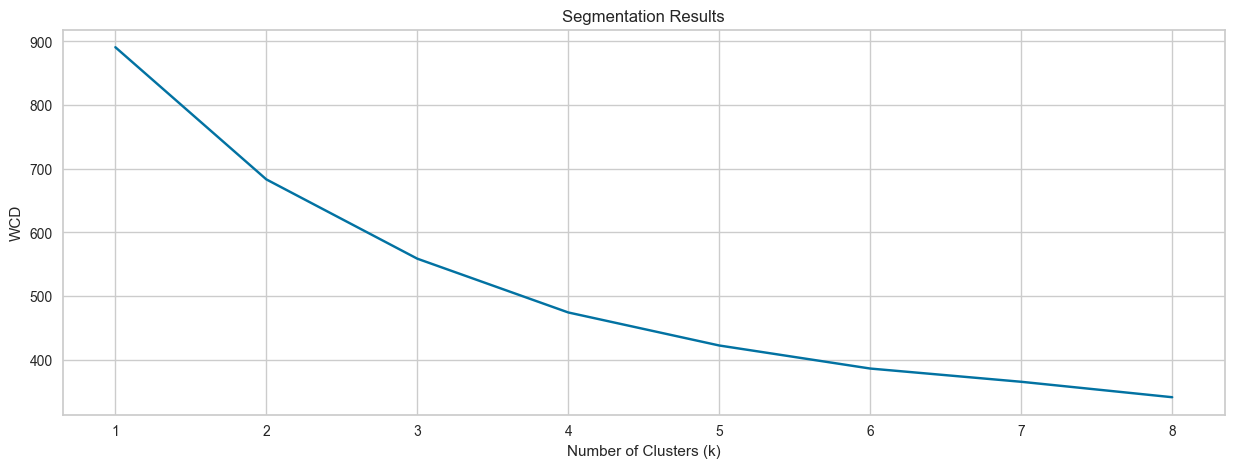

In [36]:
# Within Cluster Dsitances
WCD = []
for k in range(1,9):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 1234)
    kmeans.fit(customerscaled)
    WCD.append(kmeans.inertia_)

plt.figure(figsize = (15, 5))
plt.plot(range(1, 9), WCD)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCD")
plt.title("Segmentation Results")
plt.show()

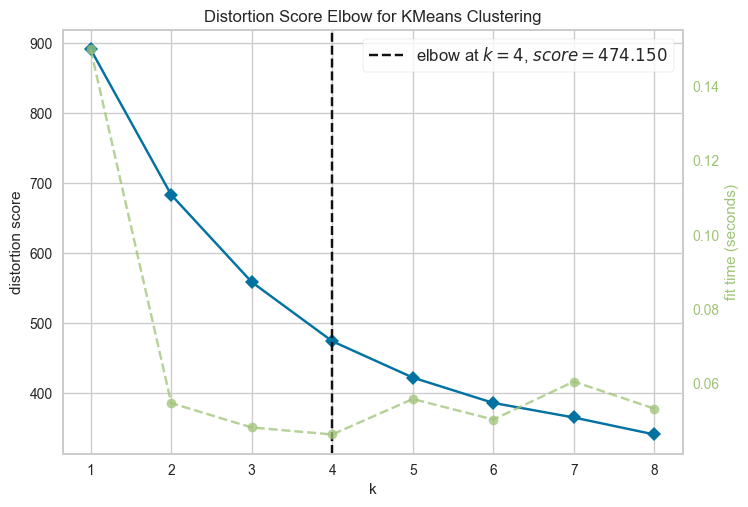

In [37]:
model = KMeans(n_init = 10, random_state = 1234)
visualizer = KElbowVisualizer(model, k = (1,9), metric = 'distortion', timings = True)
visualizer.fit(pcafit)
visualizer.show()
plt.show()

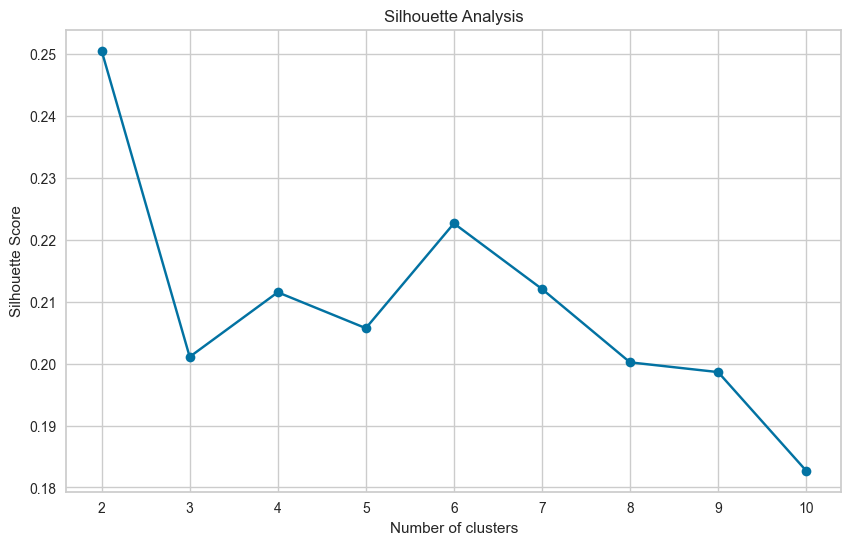

In [38]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 1234)
    kmeans.fit(customerscaled)
    score = silhouette_score(customerscaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [39]:
# Optimal number of clusters
n_clusters = 3

# Fitting K-Means
kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state = 1234)
customer['Cluster'] = kmeans.fit_predict(customerscaled)

# Profiling each segment
cluster_profiles = customer.groupby('Cluster').mean()
cluster_profiles

,Age,Profession,Marital Status,Education,No of Dependents,Personal Loan,House Loan,Total Salary,Price
Cluster,,,,,,,,,
0,28.76,0.62,0.71,0.62,0.19,0.24,0.00,1376190.48,1014761.90
1,38.59,0.65,0.00,0.55,2.65,0.04,0.22,2690196.08,1384313.73
2,37.89,0.67,0.00,0.56,2.85,0.93,0.96,2174074.07,974074.07


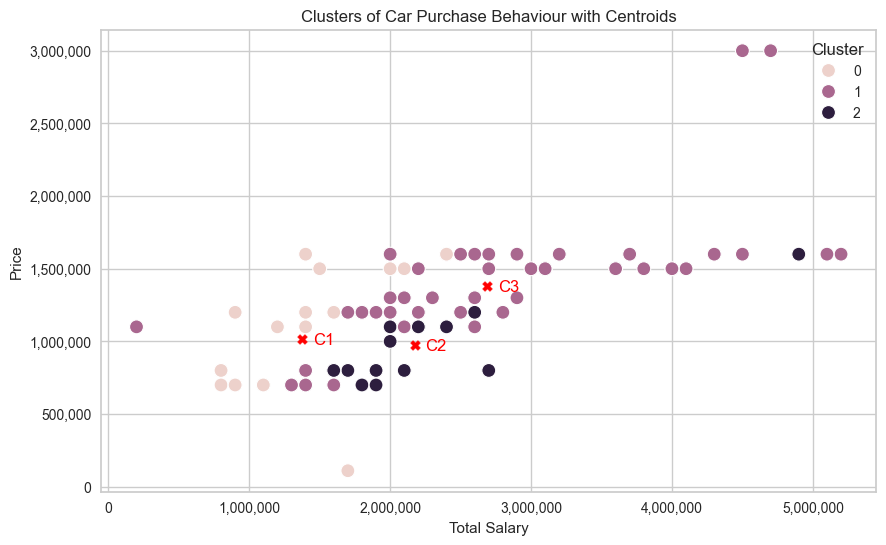

In [40]:
scaler = StandardScaler()
scaleddata = scaler.fit_transform(customer.values)
kmeans = KMeans(n_clusters = n_clusters, random_state = 1234)
kmeans.fit_transform(scaleddata)

# Visualizing clusters with centroids
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Total Salary', y='Price', hue='Cluster', data=customer, s=100, edgecolor='w')
ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 7], centroids[:, 8], s=50, c='red', marker='X')
for i, c in enumerate(centroids):
    plt.text(c[7] + 75000, c[8] - 37000, f'C{i+1}', fontsize=12, color='red')
plt.title('Clusters of Car Purchase Behaviour with Centroids')
plt.xlabel('Total Salary')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()